<a href="https://colab.research.google.com/github/sami10644/BookBuddy/blob/main/My_Goodreads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' Objective: create a model that can take a description of a book and match it with a publisher'''

''' The model will take the description of a book, and put it into a catergory. That catergory would match with the publisher
that published the book. The model should be able to predice which category a new book belongs to when given the description for that book.
Note these categories are not genres, but it is a caterigorization system that matches certain descriptions with publishers.
The real world effect of this project would be to have an author use this model and their description of their book to
find a publisher that is most likely going to publish their book, based on the publishers history of published book. '''

' The model will take the description of a book, and put it into a catergory. That catergory would match with the publisher\nthat published the book. The model should be able to predice which category a new book belongs to when given the description for that book. \nNote these categories are not genres, but it is a caterigorization system that matches certain descriptions with publishers.\nThe real world effect of this project would be to have an author use this model and their description of their book to\nfind a publisher that is most likely going to publish their book, based on the publishers history of published book. '

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import os
import glob
from pathlib import Path
# from langdetect import detect

In [ ]:
# the goal for this line of code is to take all the good read files and combine it into one : credit sam partee https://www.kaggle.com/spartee
df = pd.read_csv('book1500k-1600k.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33439 entries, 0 to 33438
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     33439 non-null  int64  
 1   Name                   33439 non-null  object 
 2   Authors                33439 non-null  object 
 3   ISBN                   33323 non-null  object 
 4   Rating                 33439 non-null  float64
 5   PublishYear            33439 non-null  int64  
 6   PublishMonth           33439 non-null  int64  
 7   PublishDay             33439 non-null  int64  
 8   Publisher              33065 non-null  object 
 9   RatingDist5            33439 non-null  object 
 10  RatingDist4            33439 non-null  object 
 11  RatingDist3            33439 non-null  object 
 12  RatingDist2            33439 non-null  object 
 13  RatingDist1            33439 non-null  object 
 14  RatingDistTotal        33439 non-null  object 
 15  Co

In [ ]:
# checking the names of all the columns
df.head()


,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews
0,1500001,Go For It!: Finding Your Own Frontier,Judith Kleinfeld,0972494421,3.00,2003,1,9,Epicenter Press,5:0,4:1,3:0,2:1,1:0,total:2,0,NaN,192,In the wake of national tragedies and an econo...,0
1,1500002,Hitler's Spanish Legion: The Blue Division in ...,Gerald R. Kleinfeld,0809308657,3.96,1979,1,6,Southern Illinois University Press,5:6,4:15,3:5,2:1,1:0,total:27,2,NaN,464,"Though well publicized in Europe, and with eno...",2
2,1500003,"Practical International Tax Planning, 4th Ed (...",Denis A. Kleinfeld,0872241289,0.00,2000,1,12,Practising Law Institute,5:0,4:0,3:0,2:0,1:0,total:0,0,NaN,1735,"As globalisation accelerates, more tax-advanta...",0
3,1500010,Memsahibs Abroad: Writings by Women Travellers...,Indira Ghose,0195644239,3.00,1999,19,8,"Oxford University Press, USA",5:0,4:0,3:1,2:0,1:0,total:1,0,NaN,316,This exciting anthology provides the best of t...,0
4,1500011,The Frail Hero and Virile History: Gender and ...,Indira Chowdhury,0195655311,0.00,2001,31,7,Not Avail,5:0,4:0,3:0,2:0,1:0,total:0,0,NaN,208,Demonstrating the centrality of gender in the ...,0


In [ ]:
df.tail()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews
33434,1599984,Horse & Rider: From Basics to Show Competition,Judy Ritcher,0668055693,4.50,1983,1,1,ARCO,5:1,4:1,3:0,2:0,1:0,total:2,0,NaN,146,"Discusses acquiring, training, and riding a ho...",0
33435,1599985,Legacy: Portraits of 50 Bay Area Environmental...,John Hart,1578051517,0.00,2005,1,9,Sierra Club Books,5:0,4:0,3:0,2:0,1:0,total:0,0,NaN,160,The San Francisco Bay Area abounds in natural ...,0
33436,1599988,"Above Carmel, Monterey Big Sur",Robert W. Cameron,0918684587,3.20,2000,1,6,Cameron Books,5:1,4:1,3:2,2:0,1:1,total:5,0,NaN,98,"Above Carmel, Monterey and Big Sur. Now you ca...",0
33437,1599989,Above Yosemite,Robert W. Cameron,091868420X,3.94,1983,1,12,Cameron Books,5:3,4:11,3:1,2:0,1:1,total:16,2,NaN,160,NaN,2
33438,1599998,Marike's World,Catherine M. Rae,0312261993,3.54,2000,13,7,Thomas Dunne Books,5:2,4:5,3:5,2:0,1:1,total:13,3,NaN,192,Just as Marike takes her first adult steps tow...,3


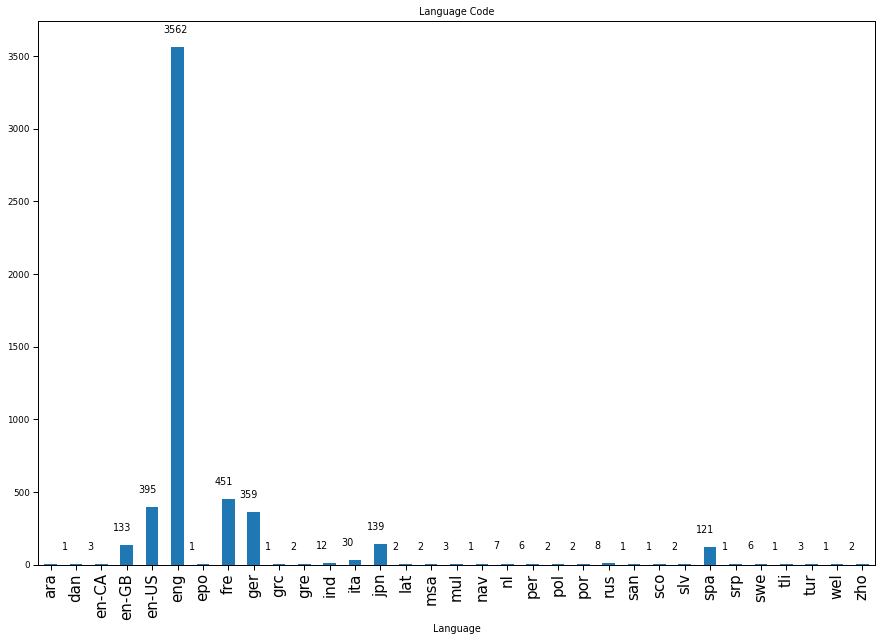

In [ ]:
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df.groupby('Language')['Name'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

In [ ]:
print(df.Language.unique())
df["Language"].describe()

[nan 'ger' 'spa' 'eng' 'en-GB' 'wel' 'ita' 'fre' 'slv' 'en-US' 'epo' 'per'
 'msa' 'jpn' 'nl' 'rus' 'por' 'mul' 'swe' 'ara' 'ind' 'lat' 'dan' 'zho'
 'pol' 'nav' 'tli' 'tur' 'grc' 'san' 'en-CA' 'gre' 'sco' 'srp']


count     5265
unique      33
top        eng
freq      3562
Name: Language, dtype: object

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()


,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews
0,1500001,Go For It!: Finding Your Own Frontier,Judith Kleinfeld,0972494421,3.00,2003,1,9,Epicenter Press,5:0,4:1,3:0,2:1,1:0,total:2,0,NaN,192,In the wake of national tragedies and an econo...,0
1,1500002,Hitler's Spanish Legion: The Blue Division in ...,Gerald R. Kleinfeld,0809308657,3.96,1979,1,6,Southern Illinois University Press,5:6,4:15,3:5,2:1,1:0,total:27,2,NaN,464,"Though well publicized in Europe, and with eno...",2
2,1500003,"Practical International Tax Planning, 4th Ed (...",Denis A. Kleinfeld,0872241289,0.00,2000,1,12,Practising Law Institute,5:0,4:0,3:0,2:0,1:0,total:0,0,NaN,1735,"As globalisation accelerates, more tax-advanta...",0
3,1500010,Memsahibs Abroad: Writings by Women Travellers...,Indira Ghose,0195644239,3.00,1999,19,8,"Oxford University Press, USA",5:0,4:0,3:1,2:0,1:0,total:1,0,NaN,316,This exciting anthology provides the best of t...,0
4,1500011,The Frail Hero and Virile History: Gender and ...,Indira Chowdhury,0195655311,0.00,2001,31,7,Not Avail,5:0,4:0,3:0,2:0,1:0,total:0,0,NaN,208,Demonstrating the centrality of gender in the ...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33439 entries, 0 to 33438
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     33439 non-null  int64  
 1   Name                   33439 non-null  object 
 2   Authors                33439 non-null  object 
 3   ISBN                   33323 non-null  object 
 4   Rating                 33439 non-null  float64
 5   PublishYear            33439 non-null  int64  
 6   PublishMonth           33439 non-null  int64  
 7   PublishDay             33439 non-null  int64  
 8   Publisher              33065 non-null  object 
 9   RatingDist5            33439 non-null  object 
 10  RatingDist4            33439 non-null  object 
 11  RatingDist3            33439 non-null  object 
 12  RatingDist2            33439 non-null  object 
 13  RatingDist1            33439 non-null  object 
 14  RatingDistTotal        33439 non-null  object 
 15  Co

In [ ]:
df.isnull().sum()

Id                           0
Name                         0
Authors                      0
ISBN                       116
Rating                       0
PublishYear                  0
PublishMonth                 0
PublishDay                   0
Publisher                  374
RatingDist5                  0
RatingDist4                  0
RatingDist3                  0
RatingDist2                  0
RatingDist1                  0
RatingDistTotal              0
CountsOfReview               0
Language                 28174
pagesNumber                  0
Description               5464
Count of text reviews        0
dtype: int64

In [ ]:
df["Language"].replace(["en-GB", "en-CA", "en-US"], "eng", inplace=True)
print(df.Language.unique())
df["Language"].describe()

[nan 'ger' 'spa' 'eng' 'wel' 'ita' 'fre' 'slv' 'epo' 'per' 'msa' 'jpn'
 'nl' 'rus' 'por' 'mul' 'swe' 'ara' 'ind' 'lat' 'dan' 'zho' 'pol' 'nav'
 'tli' 'tur' 'grc' 'san' 'gre' 'sco' 'srp']


count     5265
unique      30
top        eng
freq      4093
Name: Language, dtype: object

In [ ]:
# fill the empty descriptions with the names of the books
df.Description.fillna(df.Name, inplace=True)

In [ ]:
df =  df[["Publisher", "Description"]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33439 entries, 0 to 33438
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Publisher    33065 non-null  object
 1   Description  33439 non-null  object
dtypes: object(2)
memory usage: 522.6+ KB


In [ ]:
df.describe()

,Publisher,Description
count,33065,33439
unique,7234,33126
top,Routledge,This scarce antiquarian book is a facsimile re...
freq,532,58


In [ ]:
df.isnull().count()

Publisher      33439
Description    33439
dtype: int64

In [ ]:
# df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33439 entries, 0 to 33438
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Publisher    33065 non-null  object
 1   Description  33439 non-null  object
dtypes: object(2)
memory usage: 522.6+ KB


In [ ]:
df.isnull().sum()


Publisher      374
Description      0
dtype: int64

In [ ]:
df.describe()

,Publisher,Description
count,33065,33439
unique,7234,33126
top,Routledge,This scarce antiquarian book is a facsimile re...
freq,532,58


In [ ]:
df.dropna(inplace = True)

In [ ]:
df

,Publisher,Description
0,Epicenter Press,In the wake of national tragedies and an econo...
1,Southern Illinois University Press,"Though well publicized in Europe, and with eno..."
2,Practising Law Institute,"As globalisation accelerates, more tax-advanta..."
3,"Oxford University Press, USA",This exciting anthology provides the best of t...
4,Not Avail,Demonstrating the centrality of gender in the ...
...,...,...
33434,ARCO,"Discusses acquiring, training, and riding a ho..."
33435,Sierra Club Books,The San Francisco Bay Area abounds in natural ...
33436,Cameron Books,"Above Carmel, Monterey and Big Sur. Now you ca..."
33437,Cameron Books,Above Yosemite


In [ ]:
df.describe()

,Publisher,Description
count,33065,33065
unique,7234,32762
top,Routledge,This scarce antiquarian book is a facsimile re...
freq,532,58


In [ ]:
df.isnull().sum()

Publisher      0
Description    0
dtype: int64

In [ ]:
df.isnull().count()

Publisher      33065
Description    33065
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33065 entries, 0 to 33438
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Publisher    33065 non-null  object
 1   Description  33065 non-null  object
dtypes: object(2)
memory usage: 775.0+ KB


In [ ]:
df.describe()

,Publisher,Description
count,33065,33065
unique,7234,32762
top,Routledge,This scarce antiquarian book is a facsimile re...
freq,532,58


In [ ]:
df.dropna(inplace=True)
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33065 entries, 0 to 33438
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Publisher    33065 non-null  object
 1   Description  33065 non-null  object
dtypes: object(2)
memory usage: 775.0+ KB


In [ ]:
# these 2 columns are probably the only columns i need
# full_ds = df[["Publisher", "Description"]]

In [ ]:
# print(full_ds["Description"])

In [ ]:
# full_ds.info()

In [ ]:
df = df.dropna()

In [ ]:
df

,Publisher,Description
0,Epicenter Press,In the wake of national tragedies and an econo...
1,Southern Illinois University Press,"Though well publicized in Europe, and with eno..."
2,Practising Law Institute,"As globalisation accelerates, more tax-advanta..."
3,"Oxford University Press, USA",This exciting anthology provides the best of t...
4,Not Avail,Demonstrating the centrality of gender in the ...
...,...,...
33434,ARCO,"Discusses acquiring, training, and riding a ho..."
33435,Sierra Club Books,The San Francisco Bay Area abounds in natural ...
33436,Cameron Books,"Above Carmel, Monterey and Big Sur. Now you ca..."
33437,Cameron Books,Above Yosemite


In [ ]:


#this quick overview shows me that there are descriptions missing

In [ ]:

# objects for both publisher and description is correct

In [ ]:
# I decided to remove the rows with the missing data (either missing publisher or missing description)
# by doing this I got rid of approximately 700k rows, but I have 1.1million rows left, which I think is acceptable to work with
# I think trying to find the publishers and descriptions of the 700k rows would be too time consuming
# pub_desc = pub_desc.dropna()
# print(pub_desc)

In [ ]:
# reset the index
# pub_desc = pub_desc.reset_index(drop=True)
# print(pub_desc)

In [ ]:
# now to check if there are duplicate rows
# column_names = ['Publisher', 'Description']
# duplicates = pub_desc.duplicated(subset = column_names, keep = False )
# pub_desc[duplicates].sort_values(by = "Description")

In [ ]:
# going to drop duplicates as it wont add any value,
# but a new problem is non english characters which I have to figure out what to do about.


In [ ]:

#great no more duplications!

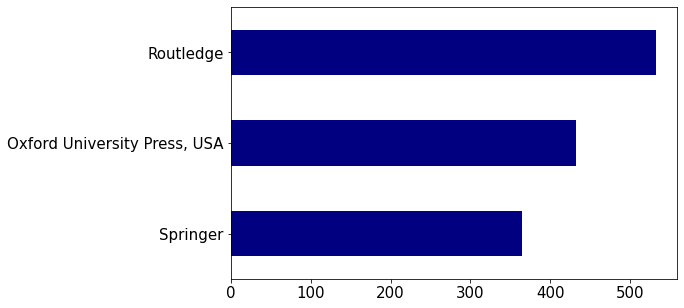

In [ ]:
df['Publisher'].value_counts()[0:3].plot(kind = 'barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()

In [ ]:
!pip install rake-nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rake_nltk import Rake

In [ ]:
# import RAKE

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['Key_words'] = ''
r = Rake()
for index, row in df.iterrows():
        r.extract_keywords_from_text(row['Description'])
        key_words_dict_scores = r.get_word_degrees()
        row['Key_words'] = list(key_words_dict_scores.keys())

In [ ]:
df

,Publisher,Description,Key_words
0,Epicenter Press,In the wake of national tragedies and an econo...,"[wake, national, tragedies, economic, downturn..."
1,Southern Illinois University Press,"Though well publicized in Europe, and with eno...","[though, well, publicized, europe, enormous, b..."
2,Practising Law Institute,"As globalisation accelerates, more tax-advanta...","[globalisation, accelerates, tax, advantaged, ..."
3,"Oxford University Press, USA",This exciting anthology provides the best of t...,"[exciting, anthology, provides, best, travel, ..."
4,Not Avail,Demonstrating the centrality of gender in the ...,"[demonstrating, centrality, gender, formation,..."
...,...,...,...
33434,ARCO,"Discusses acquiring, training, and riding a ho...","[discusses, acquiring, training, riding, horse..."
33435,Sierra Club Books,The San Francisco Bay Area abounds in natural ...,"[san, francisco, bay, area, abounds, natural, ..."
33436,Cameron Books,"Above Carmel, Monterey and Big Sur. Now you ca...","[carmel, monterey, big, sur, see, fabulous, pl..."
33437,Cameron Books,Above Yosemite,[yosemite]


In [ ]:
# I'm going to check this later
df['Publisher'] = df['Publisher'].map(lambda x: x.split(','))

for index, row in df.iterrows():

    row['Publisher'] = [x.lower().replace(' ','') for x in row['Publisher']]


In [ ]:
df

,Publisher,Description,Key_words
0,[epicenterpress],In the wake of national tragedies and an econo...,"[wake, national, tragedies, economic, downturn..."
1,[southernillinoisuniversitypress],"Though well publicized in Europe, and with eno...","[though, well, publicized, europe, enormous, b..."
2,[practisinglawinstitute],"As globalisation accelerates, more tax-advanta...","[globalisation, accelerates, tax, advantaged, ..."
3,"[oxforduniversitypress, usa]",This exciting anthology provides the best of t...,"[exciting, anthology, provides, best, travel, ..."
4,[notavail],Demonstrating the centrality of gender in the ...,"[demonstrating, centrality, gender, formation,..."
...,...,...,...
33434,[arco],"Discusses acquiring, training, and riding a ho...","[discusses, acquiring, training, riding, horse..."
33435,[sierraclubbooks],The San Francisco Bay Area abounds in natural ...,"[san, francisco, bay, area, abounds, natural, ..."
33436,[cameronbooks],"Above Carmel, Monterey and Big Sur. Now you ca...","[carmel, monterey, big, sur, see, fabulous, pl..."
33437,[cameronbooks],Above Yosemite,[yosemite]


In [ ]:
df['Bag_of_words'] = ''
columns = ['Publisher',  'Key_words']
for index, row in df.iterrows():
    words = ''
    for col in columns:
        words += ''.join(row[col]) + ' '
    row['Bag_of_words'] = words

df = df[['Publisher','Bag_of_words']]

In [ ]:
df

,Publisher,Bag_of_words
0,Epicenter Press,E p i c e n t e r P r e s s wake national tr...
1,Southern Illinois University Press,S o u t h e r n I l l i n o i s U n i v e ...
2,Practising Law Institute,P r a c t i s i n g L a w I n s t i t u t ...
3,"Oxford University Press, USA",O x f o r d U n i v e r s i t y P r e s s ...
4,Not Avail,N o t A v a i l demonstrating centrality gen...
...,...,...
33434,ARCO,A R C O discusses acquiring training riding ho...
33435,Sierra Club Books,S i e r r a C l u b B o o k s san francisc...
33436,Cameron Books,C a m e r o n B o o k s carmel monterey big ...
33437,Cameron Books,C a m e r o n B o o k s yosemite


In [ ]:
df
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['Bag_of_words'] = df['Bag_of_words'][0:1000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.describe()

,Publisher,Bag_of_words
count,33065,1000
unique,7234,997
top,Routledge,K e s s i n g e r P u b l i s h i n g scarce...
freq,532,3


In [ ]:
df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df.describe()

,Publisher,Bag_of_words
count,1000,1000
unique,651,997
top,Routledge,K e s s i n g e r P u b l i s h i n g scarce...
freq,16,3


In [ ]:
df.head()

,Publisher,Bag_of_words
0,Epicenter Press,E p i c e n t e r P r e s s wake national tr...
1,Southern Illinois University Press,S o u t h e r n I l l i n o i s U n i v e ...
2,Practising Law Institute,P r a c t i s i n g L a w I n s t i t u t ...
3,"Oxford University Press, USA",O x f o r d U n i v e r s i t y P r e s s ...
4,Not Avail,N o t A v a i l demonstrating centrality gen...


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count = CountVectorizer()
count_matrix = count.fit_transform(df['Bag_of_words'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.02192382 0.05098127 ... 0.01144222 0.         0.07079923]
 [0.02192382 1.         0.         ... 0.08579311 0.         0.0221187 ]
 [0.05098127 0.         1.         ... 0.03325031 0.         0.05143445]
 ...
 [0.01144222 0.08579311 0.03325031 ... 1.         0.         0.02308785]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.07079923 0.0221187  0.05143445 ... 0.02308785 0.         1.        ]]


In [ ]:
indices = pd.Series(df['Publisher'])

In [ ]:
indices[100]

'Lark Books (NC)'

In [ ]:
 idx = indices[indices == 'Lark Books (NC)']
 idx

100    Lark Books (NC)
Name: Publisher, dtype: object

In [ ]:
df['Publisher'],df['Bag_of_words']

(0                          Epicenter Press
 1       Southern Illinois University Press
 2                 Practising Law Institute
 3             Oxford University Press, USA
 4                                Not Avail
                        ...                
 1004                  G. K. Hall & Company
 1005                  G. K. Hall & Company
 1006              Harvard University Press
 1007                    Harlequin Intrigue
 1008                               Harmony
 Name: Publisher, Length: 1000, dtype: object,
 0       E p i c e n t e r   P r e s s wake national tr...
 1       S o u t h e r n   I l l i n o i s   U n i v e ...
 2       P r a c t i s i n g   L a w   I n s t i t u t ...
 3       O x f o r d   U n i v e r s i t y   P r e s s ...
 4       N o t   A v a i l demonstrating centrality gen...
                               ...                        
 1004    G .   K .   H a l l   &   C o m p a n y vintag...
 1005    G .   K .   H a l l   &   C o m p a n y lawren.

In [ ]:
def recommend(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)

    for i in top_10_indices:
        recommended_movies.append(list(df['Title'])[i])

    return recommended_movies

In [ ]:
recommend('Epic center')

In [ ]:
import nltk
nltk.download("punkt")

In [ ]:
!pip install word_tokenizer

In [ ]:
from gensim.models.word2vec import Word2Vec

def is_word_in_model(word, model):
    """
    Check on individual words ``word`` that it exists in ``model``.
    """
    assert type(model).__name__ == 'KeyedVectors'
    is_in_vocab = word in model.key_to_index.keys()
    return is_in_vocab

def predict_w2v(query_sentence, dataset, model, topk=3):
    query_sentence = query_sentence.split()
    in_vocab_list, best_index = [], [0]*topk
    for w in query_sentence:
        # remove unseen words from query sentence
        if is_word_in_model(w, model.wv):
            in_vocab_list.append(w)
    # Retrieve the similarity between two words as a distance
    if len(in_vocab_list) > 0:
        sim_mat = np.zeros(len(dataset))  # TO DO
        for i, data_sentence in enumerate(dataset):
            if data_sentence:
                sim_sentence = model.wv.n_similarity(
                        in_vocab_list, data_sentence)
            else:
                sim_sentence = 0
            sim_mat[i] = np.array(sim_sentence)
        # Take the five highest norm
        best_index = np.argsort(sim_mat)[::-1][:topk]
    return best_index

# Create model
word2vec_model = Word2Vec(min_count=0, workers = 8)
# Prepare vocab
word2vec_model.build_vocab(df.Bag_of_words.values)
# Train
word2vec_model.train(df.Bag_of_words.values, total_examples=word2vec_model.corpus_count, epochs=30)

# Predict



In [ ]:
best_index = predict(test_sentence, df['tok_lem_sentence'].values, word2vec_model)
display(df[['original_title', 'genres', 'sentence']].iloc[best_index])

In [ ]:
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
[stemmer.lemmatize(w) for w in word_tokenize(sentence)]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


def get_recommendations_tfidf(sentence, tfidf_mat):

    """
    Return the database sentences in order of highest cosine similarity relatively to each
    token of the target sentence.
    """
    # Embed the query sentence
    tokens_query = [str(tok) for tok in df(sentence)]
    embed_query = vectorizer.transform(tokens_query)
    # Create list with similarity between query and dataset
    mat = cosine_similarity(embed_query, tfidf_mat)
    # Best cosine distance for each token independantly
    best_index = extract_best_indices(mat, topk=3)
    return best_index

# Adapt stop words
token_stop = tokenizer(' '.join(stop_words), lemmatize=False)

# Fit TFIDF
vectorizer = TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer)
tfidf_mat = vectorizer.fit_transform(df['sentence'].values) # -> (num_sentences, num_vocabulary)

# Return best threee matches between query and dataset
test_sentence = 'a crime story with a beautiful woman'
best_index = get_recommendations_tfidf(test_sentence, tfidf_mat)

display(df[['original_title', 'genres', 'sentence']].iloc[best_index])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def extract_best_indices(m, topk, mask=None):
    """
    Use sum of the cosine distance over all tokens ans return best mathes.
    m (np.array): cos matrix of shape (nb_in_tokens, nb_dict_tokens)
    topk (int): number of indices to return (from high to lowest in order)
    """
    # return the sum on all tokens of cosinus for each sentence
    if len(m.shape) > 1:
        cos_sim = np.mean(m, axis=0)
    else:
        cos_sim = m
    index = np.argsort(cos_sim)[::-1] # from highest idx to smallest score
    if mask is not None:
        assert mask.shape == m.shape
        mask = mask[index]
    else:
        mask = np.ones(len(cos_sim))
    mask = np.logical_or(cos_sim[index] != 0, mask) #eliminate 0 cosine distance
    best_index = index[mask][:topk]
    return best_index